##PANDAS

In [7]:
### Bai 1
import pandas as pd
import numpy as np

data= {
    'ID' : [101,102,103,104,105],
    'Name' : ['Quynh nhu','Hoang Hai', None, 'Phuong Tuan','Thien An'],
    'Áge' : [26,18,20,None,19],
    'Salary' : [50000,35000,65000,100000,None]

}
df = pd.DataFrame(data)
df

,ID,Name,Áge,Salary
0,101,Quynh nhu,26.0,50000.0
1,102,Hoang Hai,18.0,35000.0
2,103,None,20.0,65000.0
3,104,Phuong Tuan,NaN,100000.0
4,105,Thien An,19.0,NaN


In [5]:
import pandas as pd
import numpy as np

# Tạo DataFrame mẫu có dữ liệu thiếu
data = {
    "Name": ["Alice", "Bob", np.nan, "David", "Eva"],
    "Age": [23, np.nan, 25, 24, np.nan],
    "Salary": [60000, 52000, np.nan, 58000, np.nan]
}

df = pd.DataFrame(data)

# 1. Điền giá trị thiếu trong Age bằng giá trị trung bình
df['Age'] = df['Age'].fillna(df['Age'].mean())
print("Điền giá trị thiếu trong Age thành giá trị trung bình:")
print(df)

# 2. Loại bỏ các dòng chứa dữ liệu thiếu
df_dropped = df.dropna()
print("\nLoại bỏ các dòng dữ liệu thiếu trong Data:")
print(df_dropped)

# 3. Điền giá trị thiếu trong Name thành "Unknown"
df['Name'] = df['Name'].fillna("Unknown")
print("\nĐiền giá trị thiếu trong Name thành 'Unknown':")
print(df)

# 4. Điền giá trị thiếu trong Salary bằng phương pháp Interpolation
df['Salary'] = df['Salary'].interpolate(method='linear')
print("\nĐiền giá trị thiếu trong Salary bằng phương pháp Interpolation:")
print(df)

Điền giá trị thiếu trong Age thành giá trị trung bình:
    Name   Age   Salary
0  Alice  23.0  60000.0
1    Bob  24.0  52000.0
2    NaN  25.0      NaN
3  David  24.0  58000.0
4    Eva  24.0      NaN

Loại bỏ các dòng dữ liệu thiếu trong Data:
    Name   Age   Salary
0  Alice  23.0  60000.0
1    Bob  24.0  52000.0
3  David  24.0  58000.0

Điền giá trị thiếu trong Name thành 'Unknown':
      Name   Age   Salary
0    Alice  23.0  60000.0
1      Bob  24.0  52000.0
2  Unknown  25.0      NaN
3    David  24.0  58000.0
4      Eva  24.0      NaN

Điền giá trị thiếu trong Salary bằng phương pháp Interpolation:
      Name   Age   Salary
0    Alice  23.0  60000.0
1      Bob  24.0  52000.0
2  Unknown  25.0  55000.0
3    David  24.0  58000.0
4      Eva  24.0  58000.0


In [8]:
# Correct DataFrame creation
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Score_A': [70, 90, 85]
})

df2 = pd.DataFrame({
    'ID': [3, 4, 5],
    'Score_B': [62, 91, 75]
})

# 1. Thực hiện Merge trên cột ID
# Inner join
inner_join = pd.merge(df1, df2, on='ID', how='inner')
print("Inner Join:")
print(inner_join)

# Left join
left_join = pd.merge(df1, df2, on='ID', how='left')
print("\nLeft Join:")
print(left_join)

# Outer join
outer_join = pd.merge(df1, df2, on='ID', how='outer')
print("\nOuter Join:")
print(outer_join)

# 2. Nối DataFrame theo chiều dọc
concat = pd.concat([df1, df2], axis=0)
print("\nNối theo chiều dọc:")
print(concat)

# 3. Gộp df1 và df2 để điền giá trị thiếu
merge = pd.merge(df1, df2, on='ID', how='outer')
print("\nGộp và điền giá trị thiếu:")
print(merge)

df1.set_index('ID').combine_first(df2.set_index('ID')).reset_index()

Inner Join:
   ID  Score_A  Score_B
0   3       85       62

Left Join:
   ID  Score_A  Score_B
0   1       70      NaN
1   2       90      NaN
2   3       85     62.0

Outer Join:
   ID  Score_A  Score_B
0   1     70.0      NaN
1   2     90.0      NaN
2   3     85.0     62.0
3   4      NaN     91.0
4   5      NaN     75.0

Nối theo chiều dọc:
   ID  Score_A  Score_B
0   1     70.0      NaN
1   2     90.0      NaN
2   3     85.0      NaN
0   3      NaN     62.0
1   4      NaN     91.0
2   5      NaN     75.0

Gộp và điền giá trị thiếu:
   ID  Score_A  Score_B
0   1     70.0      NaN
1   2     90.0      NaN
2   3     85.0     62.0
3   4      NaN     91.0
4   5      NaN     75.0


,ID,Score_A,Score_B
0,1,70.0,NaN
1,2,90.0,NaN
2,3,85.0,62.0
3,4,NaN,91.0
4,5,NaN,75.0


In [10]:
#Bài 3
data = pd.DataFrame({
    'ID': list(range(1, 1000001)),
    'Value': np.random.randint(1, 100, 1000000)
})
## Dùng .astype để tối ưu hóa bộ nhớ
# 1. Tối ưu hóa
data['ID'] = data['ID'].astype('int32')
data['Value'] = data['Value'].astype('int8')

# 2. Tìm 5 giá trị phổ biến nhất trong cột Value
value_counts = data['Value'].value_counts().head(5)

# 3. Sử dụng query để lọc dữ liệu
data.query('Value > 90')




,ID,Value
0,1,97
2,3,93
6,7,95
12,13,91
26,27,97
...,...,...
999989,999990,91
999992,999993,95
999994,999995,96
999995,999996,94


##MATPLOTLIB

In [11]:
## Bài 1 dữ liệu nhiều đường
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0,10,100)
y1 = np.sin(t)
y2 = np.sin(t)
y3 = np.sin(t) * np.cos(t)


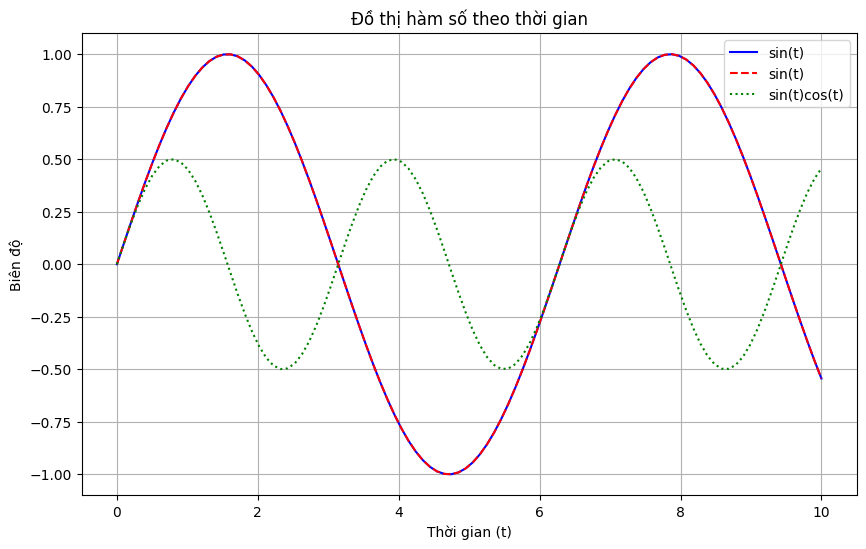

In [12]:
## tạo biểu đồ các đường theo thời gian

plt.figure(figsize=(10, 6))
plt.plot(t, y1, 'b-', label='sin(t)')
plt.plot(t, y2, 'r--', label='sin(t)')
plt.plot(t, y3, 'g:', label='sin(t)cos(t)')

plt.xlabel('Thời gian (t)')
plt.ylabel('Biên độ')
plt.title('Đồ thị hàm số theo thời gian')
plt.grid(True)
plt.legend()
plt.show()

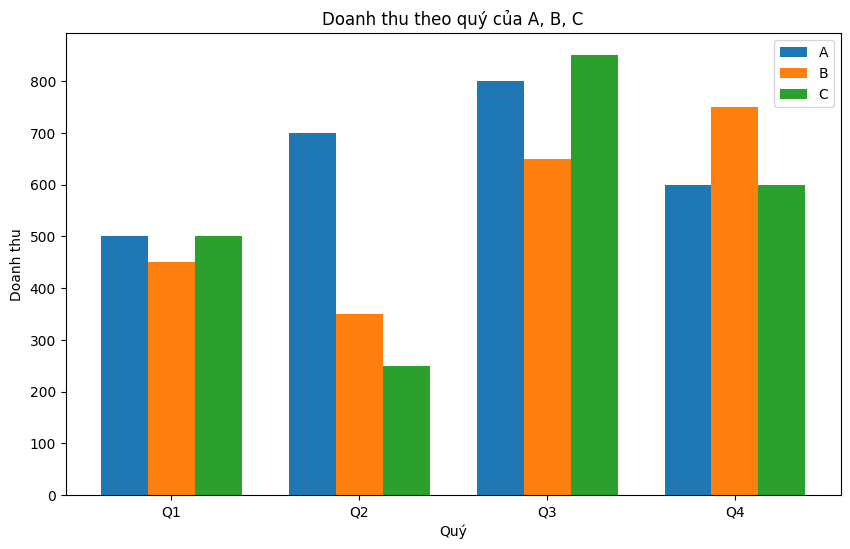

In [13]:
## biểu đồ thanh nhóm
# cho dữ liệu
labels = ['Q1','Q2','Q3','Q4']
A = [500,700,800,600]
B = [450,350,650,750]
C = [500,250,850,600]

# Vẽ biểu đồ thanh nhóm thể hiện doanh thu của A, B, C trong 4 quý

x = np.arange(len(labels))  # Vị trí của các nhóm
width = 0.25  # Độ rộng của mỗi thanh

plt.figure(figsize=(10, 6))
plt.bar(x - width, A, width, label='A')
plt.bar(x, B, width, label='B')
plt.bar(x + width, C, width, label='C')

plt.title('Doanh thu theo quý của A, B, C')
plt.xlabel('Quý')
plt.ylabel('Doanh thu')
plt.xticks(x, labels)
plt.legend()

plt.show()

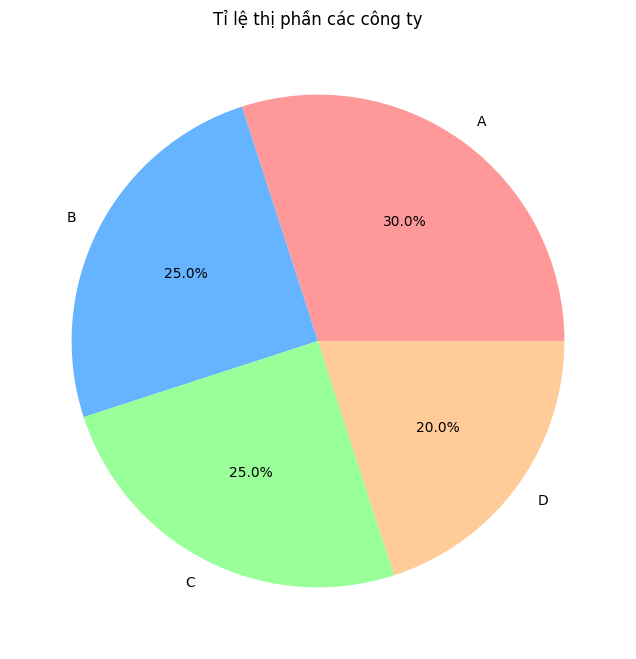

In [14]:
## biểu đồ tròn
Cty = ['A','B','C','D']
thiphan = [30,25,25,20]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
# tạo biểu đồ tròn hiển thị tỉ lệ thị phần của 4 công ty
plt.figure(figsize=(8, 8))
plt.pie(thiphan, labels=Cty, colors=colors, autopct='%1.1f%%')
plt.title('Tỉ lệ thị phần các công ty')
plt.show()

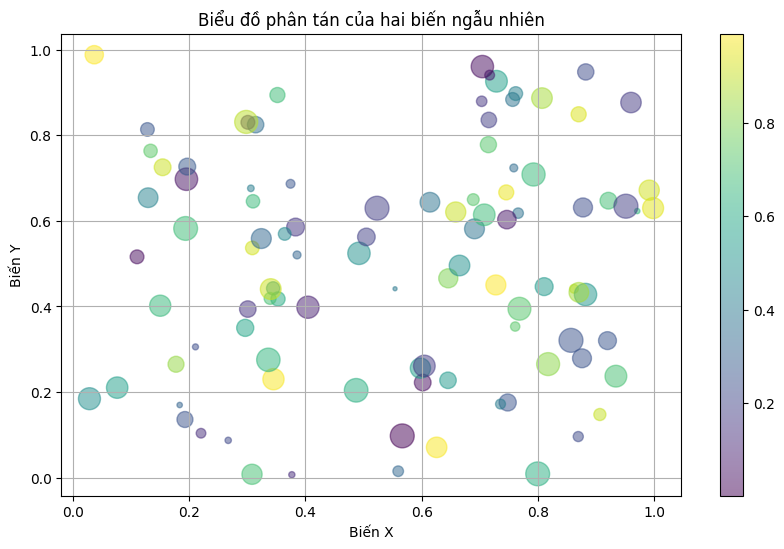

In [15]:
## Biểu đồ phân tán
x = np.random.rand(100)
y = np.random.rand(100)
sizes = np.random.rand(100)*300
colors = np.random.rand(100)

# tạo biều đồ phân tán của hai biến ngẫu nhiên
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, c=colors, alpha=0.5, cmap='viridis')
plt.colorbar()  # Thêm thanh màu
plt.title('Biểu đồ phân tán của hai biến ngẫu nhiên')
plt.xlabel('Biến X')
plt.ylabel('Biến Y')
plt.grid(True)
plt.show()

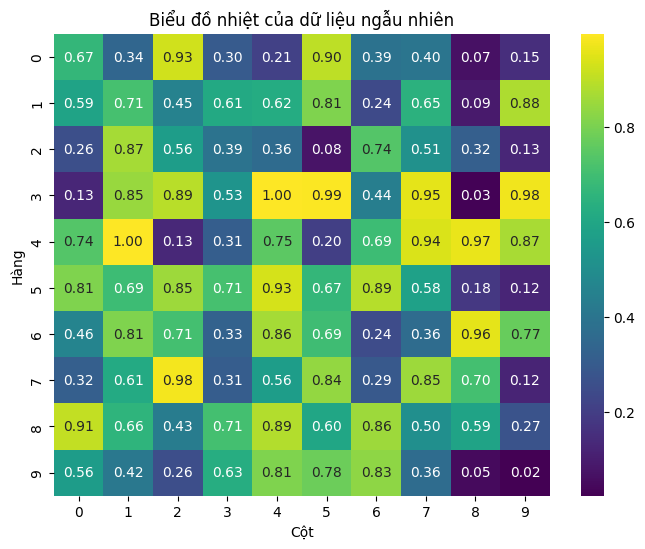

In [16]:
## biểu đồ nhiệt
import seaborn as sns
data = np.random.rand(10,10)
# vẽ một heatmap thể hiện sự phân bố của của dữ liệu trên ma trận
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt=".2f", cmap='viridis', cbar=True)
plt.title('Biểu đồ nhiệt của dữ liệu ngẫu nhiên')
plt.xlabel('Cột')
plt.ylabel('Hàng')
plt.show()